In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
precipitation = {'Jan':[5.6], 'Feb':[5.9], 'Mar':[4.1], 'Apr':[1.1], 'May':[0.6], 'Jun':[0.1],
                 'Jul':[0.01], 'Aug':[0.01], 'Sep':[0.1], 'Oct':[0.9], 'Nov':[1.4], 'Dec':[3.3]}
monthly_precipitation = pd.DataFrame(data=precipitation)

In [3]:
monthly_precipitation

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,5.6,5.9,4.1,1.1,0.6,0.1,0.01,0.01,0.1,0.9,1.4,3.3


In [4]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [5]:
buildings = gpd.read_file('/Users/jacobbasinger/Desktop/Watershed Progressive/GIS_Intern_Skills_Test_Data.shp/Buildings.shp')

<AxesSubplot:>

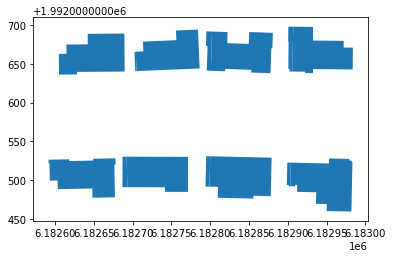

In [6]:
buildings.plot()

In [7]:
buildings.head()

,Shape_Leng,Shape_Area,Bldg_ID,geometry
0,327.296216,3639.258818,A,MULTIPOLYGON Z (((6182705.034 1992640.558 0.00...
1,378.700423,3594.692765,B,MULTIPOLYGON Z (((6182802.222 1992691.542 0.00...
2,422.995297,3781.848801,C,MULTIPOLYGON Z (((6182821.835 1992676.573 0.00...
3,274.203169,3310.957295,D,"POLYGON Z ((6182905.509 1992640.004 0.000, 618..."
4,334.633531,4113.261043,E,MULTIPOLYGON Z (((6182903.849 1992522.572 0.00...


In [8]:
for month in months:
    buildings[month]=buildings['Shape_Area']*monthly_precipitation[month][0]/12*.85/(1/7.48)
#the equation gives us the amount of cubic feet, so conversion at end is to see how many gallons we get
#1 cubic foot = 7.48 gallons

In [9]:
buildings

,Shape_Leng,Shape_Area,Bldg_ID,geometry,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,327.296216,3639.258818,A,MULTIPOLYGON Z (((6182705.034 1992640.558 0.00...,10797.923530,11376.383719,7905.622585,2121.020693,1156.920378,192.820063,19.282006,19.282006,192.820063,1735.380567,2699.480883,6363.062080
1,378.700423,3594.692765,B,MULTIPOLYGON Z (((6182802.222 1992691.542 0.00...,10665.693079,11237.069494,7808.811004,2095.046855,1142.752830,190.458805,19.045880,19.045880,190.458805,1714.129245,2666.423270,6285.140564
2,422.995297,3781.848801,C,MULTIPOLYGON Z (((6182821.835 1992676.573 0.00...,11220.997516,11822.122382,8215.373181,2204.124512,1202.249734,200.374956,20.037496,20.037496,200.374956,1803.374601,2805.249379,6612.373536
3,274.203169,3310.957295,D,"POLYGON Z ((6182905.509 1992640.004 0.000, 618...",9823.831025,10350.107687,7192.447715,1929.681094,1052.553324,175.425554,17.542555,17.542555,175.425554,1578.829986,2455.957756,5789.043283
4,334.633531,4113.261043,E,MULTIPOLYGON Z (((6182903.849 1992522.572 0.00...,12204.319732,12858.122575,8935.305518,2397.277090,1307.605686,217.934281,21.793428,21.793428,217.934281,1961.408528,3051.079933,7191.831271
5,298.293380,4060.215962,F,"POLYGON Z ((6182903.024 1992492.154 0.000, 618...",12046.931439,12692.302766,8820.074803,2366.361533,1290.742654,215.123776,21.512378,21.512378,215.123776,1936.113981,3011.732860,7099.084598
6,367.651641,3598.945950,G,MULTIPOLYGON Z (((6182677.835 1992528.151 0.00...,10678.312564,11250.365023,7818.050270,2097.525682,1144.104918,190.684153,19.068415,19.068415,190.684153,1716.157376,2669.578141,6292.577047
7,336.173892,3466.562519,H,MULTIPOLYGON Z (((6182771.360 1992530.031 0.00...,10285.522097,10836.532210,7530.471536,2020.370412,1102.020225,183.670037,18.367004,18.367004,183.670037,1653.030337,2571.380524,6061.111236


In [10]:
collection_potential = buildings[['Bldg_ID', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']][0:4]

In [11]:
collection_potential

,Bldg_ID,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,A,10797.923530,11376.383719,7905.622585,2121.020693,1156.920378,192.820063,19.282006,19.282006,192.820063,1735.380567,2699.480883,6363.062080
1,B,10665.693079,11237.069494,7808.811004,2095.046855,1142.752830,190.458805,19.045880,19.045880,190.458805,1714.129245,2666.423270,6285.140564
2,C,11220.997516,11822.122382,8215.373181,2204.124512,1202.249734,200.374956,20.037496,20.037496,200.374956,1803.374601,2805.249379,6612.373536
3,D,9823.831025,10350.107687,7192.447715,1929.681094,1052.553324,175.425554,17.542555,17.542555,175.425554,1578.829986,2455.957756,5789.043283


In [12]:
impervious_surface = gpd.read_file('/Users/jacobbasinger/Desktop/Watershed Progressive/GIS_Intern_Skills_Test_Data.shp/Impervious_Surface.shp')

<AxesSubplot:>

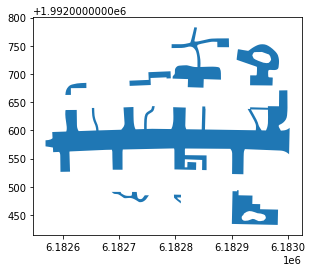

In [13]:
impervious_surface.plot()

In [14]:
for month in months:
    impervious_surface[month]=impervious_surface['Shape_Area']*monthly_precipitation[month][0]/12*.85/(1/7.48)

In [15]:
impervious_surface

,Shape_Leng,Shape_Area,geometry,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,4071.393618,33819.498596,MULTIPOLYGON Z (((6182809.860 1992485.844 0.00...,100344.706966,105720.316268,73466.660457,19710.56744,10751.218604,1791.869767,179.186977,179.186977,1791.869767,16126.827905,25086.176742,59131.702319


In [16]:
impervious_surface[months].sum(axis=1)

0    414280.290189
dtype: float64